# Project Title : Predicting Weight from Height Using Linear Regression

Objective : Build a linear regression model to predict weight based on height and evaluate its performance.

Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Create the Dataset

In [6]:
# Manually input the dataset
data = {
"Height": [63, 64, 66, 69, 70, 65, 68, 72, 71, 67],
"Weight_lbs": [127, 121, 142, 157, 162, 135, 149, 175, 168, 145]
}
# Convert to DataFrame
df = pd.DataFrame(data)

In [8]:
df

,Height,Weight_lbs
0,63,127
1,64,121
2,66,142
3,69,157
4,70,162
5,65,135
6,68,149
7,72,175
8,71,168
9,67,145


In [14]:
# convert weight to kilogram (1lb =0.456592 kg )

df["Weight_kg"] =df["Weight_lbs"] * 0.453592 

#drop original weight_lbs column 

df.drop(columns=["Weight_lbs"], inplace=True)
df

,Height,Weight_kg
0,63,57.606184
1,64,54.884632
2,66,64.410064
3,69,71.213944
4,70,73.481904
5,65,61.234920
6,68,67.585208
7,72,79.378600
8,71,76.203456
9,67,65.770840


Step 3: Exploratory Data Analysis (EDA)

In [15]:
# Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Height  Weight_kg
0      63  57.606184
1      64  54.884632
2      66  64.410064
3      69  71.213944
4      70  73.481904


In [16]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Height  Weight_kg
count  10.00000  10.000000
mean   67.50000  67.176975
std     3.02765   7.987599
min    63.00000  54.884632
25%    65.25000  62.028706
50%    67.50000  66.678024
75%    69.75000  72.914914
max    72.00000  79.378600


In [17]:
# Check correlation
print("\nCorrelation between Height and Weight:")
print(df.corr())


Correlation between Height and Weight:
             Height  Weight_kg
Height     1.000000   0.984697
Weight_kg  0.984697   1.000000


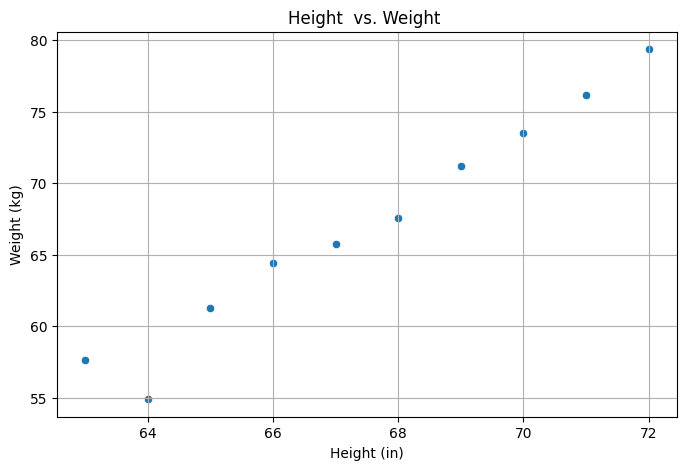

In [21]:
# Visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Height", y="Weight_kg", data=df)
plt.title("Height  vs. Weight ")
plt.xlabel("Height (in)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()

Step 4: Prepare Data for Modeling

In [36]:
# Define features (X) and target (y)
X = df[["Height"]] # 2D array required by scikit-learn
y = df["Weight_kg"] #target variable 

Step 5: Train the Linear Regression Model

In [37]:
# Initialize and fit the model  also y= mx++b
model = LinearRegression()
model.fit(X, y)

# Extract coefficients

beta_0 = model.intercept_ #intercept  also m 
beta_1 = model.coef_[0]   #slope also b

print(f"\nModel Equation: Weight (kg) = {beta_0:.2f} + {beta_1:.2f} * Height (in)")


Model Equation: Weight (kg) = -108.18 + 2.60 * Height (in)


Step 6: Make Predictions

In [38]:
# Predict on the same dataset (for visualization)
df["Predicted Weight (kg)"] = model.predict(X)

# Predict for a new height (e.g., 70 inches)

new_height = pd.DataFrame({"Height": [70]})
predicted_weight = model.predict(new_height)

print(f"Predicted weight for 70 inches: {predicted_weight[0]:.2f} kg")

Predicted weight for 70 inches: 73.67 kg


Step 7: Evaluate the Model

In [39]:
# Calculate metrics
mse = mean_squared_error(y, df["Predicted Weight (kg)"])
rmse = np.sqrt(mse)
r2 = r2_score(y, df["Predicted Weight (kg)"])

print(f"\nMSE: {mse:.2f} (kg²)")
print(f"RMSE: {rmse:.2f} kg")
print(f"R-squared: {r2:.2f}")


MSE: 1.74 (kg²)
RMSE: 1.32 kg
R-squared: 0.97


Step 8: Visualize the Regression Line

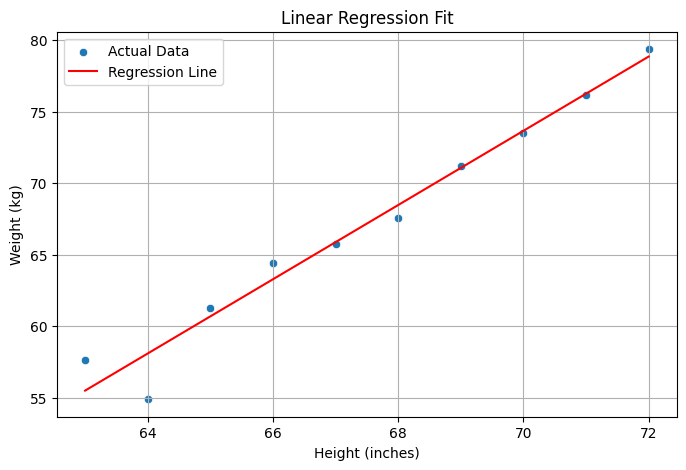

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Height", y="Weight_kg", data=df, label="Actual Data")
sns.lineplot(x="Height", y="Predicted Weight (kg)", data=df, color="red", label="Regression Line")
plt.title("Linear Regression Fit")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.legend()
plt.show()

Step 9: Key Takeaways

1. Model Performance :
R-squared = 0.97 (97% of variance in weight explained by height).
RMSE = 1.32 (predictions are off by ~1.3 kg on average).
2. Interpretation :
For every additional inch in height, weight increases by 2.60 kgs .

